In [43]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

In [44]:
heart = pd.read_csv('/Users/artemmoskvin/Documents/Data-Science/Data/heart.csv')

In [45]:
heart['old'] = heart['age'].apply(lambda x: 1 if x > 60 else 0)

In [46]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


In [47]:
def get_bps(heart):
    if heart['age'] < 20 and heart['sex'] == 1:
        return 123
    elif 20 < heart['age'] < 31 and heart['sex'] == 1:
        return 126
    elif 30 < heart['age'] < 41 and heart['sex'] == 1:
        return 129
    elif 40 < heart['age'] < 51 and heart['sex'] == 1:
        return 135
    elif 50 < heart['age'] < 61 and heart['sex'] == 1:
        return 142
    elif heart['age'] > 60 and heart['sex'] == 1:
        return 142
    else:
        if heart['age'] < 20 and heart['sex'] == 0:
            return 116
        elif 20 < heart['age'] < 31 and heart['sex'] == 0:
            return 120
        elif 30 < heart['age'] < 41 and heart['sex'] == 0:
            return 127
        elif 40 < heart['age'] < 51 and heart['sex'] == 0:
            return 137
        elif 50 < heart['age'] < 61 and heart['sex'] == 0:
            return 144
        elif heart['age'] > 60 and heart['sex'] == 0:
            return 159
heart['trestbps_mean'] = heart.apply(get_bps, axis=1) 

In [48]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144


In [49]:
heart.iloc[300]

age               68.0
sex                1.0
cp                 0.0
trestbps         144.0
chol             193.0
fbs                1.0
restecg            1.0
thalach          141.0
exang              0.0
oldpeak            3.4
slope              1.0
ca                 2.0
thal               3.0
target             0.0
old                1.0
trestbps_mean    142.0
Name: 300, dtype: float64

In [50]:
encoder = ce.OneHotEncoder(cols=['cp']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart['cp'])
heart2 = pd.concat([heart, type_bin], axis=1)
heart2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean,cp_1,cp_2,cp_3,cp_4
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142,1,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,144,0,0,0,1
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,135,1,0,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1,142,0,0,0,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0,142,0,0,0,1


In [51]:
encoder = ce.OneHotEncoder(cols=['restecg']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart2['restecg'])
heart3 = pd.concat([heart2, type_bin], axis=1)
heart3

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,target,old,trestbps_mean,cp_1,cp_2,cp_3,cp_4,restecg_1,restecg_2,restecg_3
0,63,1,3,145,233,1,0,150,0,2.3,...,1,1,142,1,0,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,1,0,129,0,1,0,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,137,0,0,1,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,142,0,0,1,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,1,0,144,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,0,0,144,0,0,0,1,0,1,0
299,45,1,3,110,264,0,1,132,0,1.2,...,0,0,135,1,0,0,0,0,1,0
300,68,1,0,144,193,1,1,141,0,3.4,...,0,1,142,0,0,0,1,0,1,0
301,57,1,0,130,131,0,1,115,1,1.2,...,0,0,142,0,0,0,1,0,1,0


In [52]:
encoder = ce.OneHotEncoder(cols=['slope']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart3['slope'])
heart4 = pd.concat([heart3, type_bin], axis=1)
heart4

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,cp_4,restecg_1,restecg_2,restecg_3,slope_1,slope_2,slope_3
0,63,1,3,145,233,1,0,150,0,2.3,...,1,0,0,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,0,1,0,1,0,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,0,1,0,0,1,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,0,0,0,1,0,1,0,0,0,1
299,45,1,3,110,264,0,1,132,0,1.2,...,1,0,0,0,0,1,0,0,0,1
300,68,1,0,144,193,1,1,141,0,3.4,...,0,0,0,1,0,1,0,0,0,1
301,57,1,0,130,131,0,1,115,1,1.2,...,0,0,0,1,0,1,0,0,0,1


In [53]:
encoder = ce.OneHotEncoder(cols=['ca']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart4['ca'])
heart5 = pd.concat([heart4, type_bin], axis=1)
heart5

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,restecg_2,restecg_3,slope_1,slope_2,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,0,1,0,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,1,0,1,0,0,1,0,0,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,0,0,1,0,1,0,0,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,1,0,1,0,0,0,0
4,57,0,0,120,354,0,1,163,1,0.6,...,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,1,0,0,0,1,1,0,0,0,0
299,45,1,3,110,264,0,1,132,0,1.2,...,1,0,0,0,1,1,0,0,0,0
300,68,1,0,144,193,1,1,141,0,3.4,...,1,0,0,0,1,0,1,0,0,0
301,57,1,0,130,131,0,1,115,1,1.2,...,1,0,0,0,1,0,0,1,0,0


In [54]:
encoder = ce.OneHotEncoder(cols=['thal']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart5['thal'])
heart6 = pd.concat([heart5, type_bin], axis=1)
heart6

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,0,0,1,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,0,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,1,0,0,0,0,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,1,0,0,0,0,0,1,0,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,1,1,0,0,0,0,0,0,1,0
299,45,1,3,110,264,0,1,132,0,1.2,...,1,1,0,0,0,0,0,0,1,0
300,68,1,0,144,193,1,1,141,0,3.4,...,1,0,1,0,0,0,0,0,1,0
301,57,1,0,130,131,0,1,115,1,1.2,...,1,0,0,1,0,0,0,0,1,0


In [55]:
heart6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  target         303 non-null    int64  
 14  old            303 non-null    int64  
 15  trestbps_mean  303 non-null    int64  
 16  cp_1           303 non-null    int64  
 17  cp_2           303 non-null    int64  
 18  cp_3      

In [56]:
heart['oldpeak'] = heart['oldpeak'].astype('int64')

<AxesSubplot:title={'center':'Исходные распределения'}, xlabel='chol', ylabel='Density'>

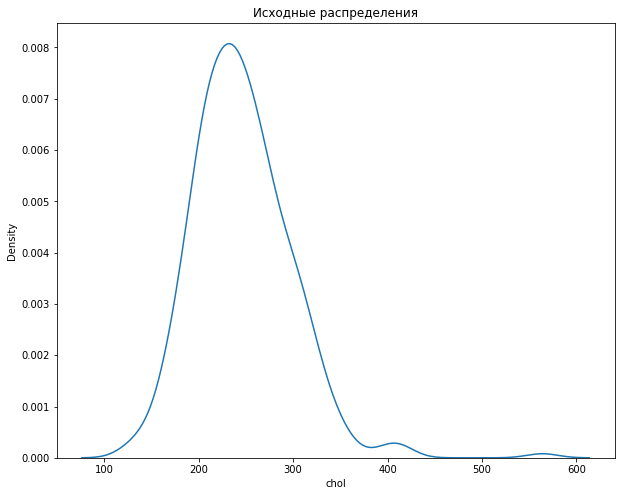

In [57]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')
sns.kdeplot(heart6['chol'], ax=ax1)

In [58]:
heart6.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,...,0.462046,0.577558,0.125413,0.214521,0.066007,0.016502,0.059406,0.547855,0.386139,0.006601
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,...,0.499382,0.494765,0.331734,0.411169,0.248704,0.127605,0.236774,0.498528,0.487668,0.081110
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:title={'center':'Распределения после RobustScaler'}, xlabel='chol', ylabel='Density'>

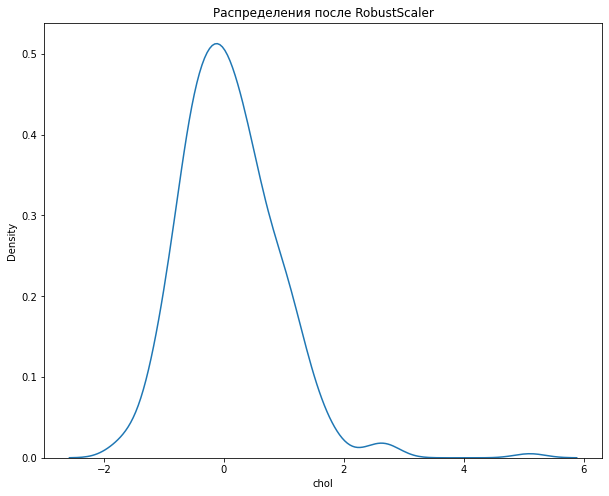

In [59]:
r_scaler = preprocessing.RobustScaler()
heart6[['chol']] = r_scaler.fit_transform(heart6[['chol']])
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')
sns.kdeplot(heart6['chol'], ax=ax1)

In [60]:
heart6.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,0.098646,0.148515,0.528053,149.646865,0.326733,1.039604,...,0.462046,0.577558,0.125413,0.214521,0.066007,0.016502,0.059406,0.547855,0.386139,0.006601
std,9.082101,0.466011,1.032052,17.538143,0.816232,0.356198,0.525860,22.905161,0.469794,1.161075,...,0.499382,0.494765,0.331734,0.411169,0.248704,0.127605,0.236774,0.498528,0.487668,0.081110
min,29.000000,0.000000,0.000000,94.000000,-1.795276,0.000000,0.000000,71.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,-0.456693,0.000000,0.000000,133.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,0.000000,0.000000,1.000000,153.000000,0.000000,0.800000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,0.543307,0.000000,1.000000,166.000000,1.000000,1.600000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,77.000000,1.000000,3.000000,200.000000,5.102362,1.000000,2.000000,202.000000,1.000000,6.200000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

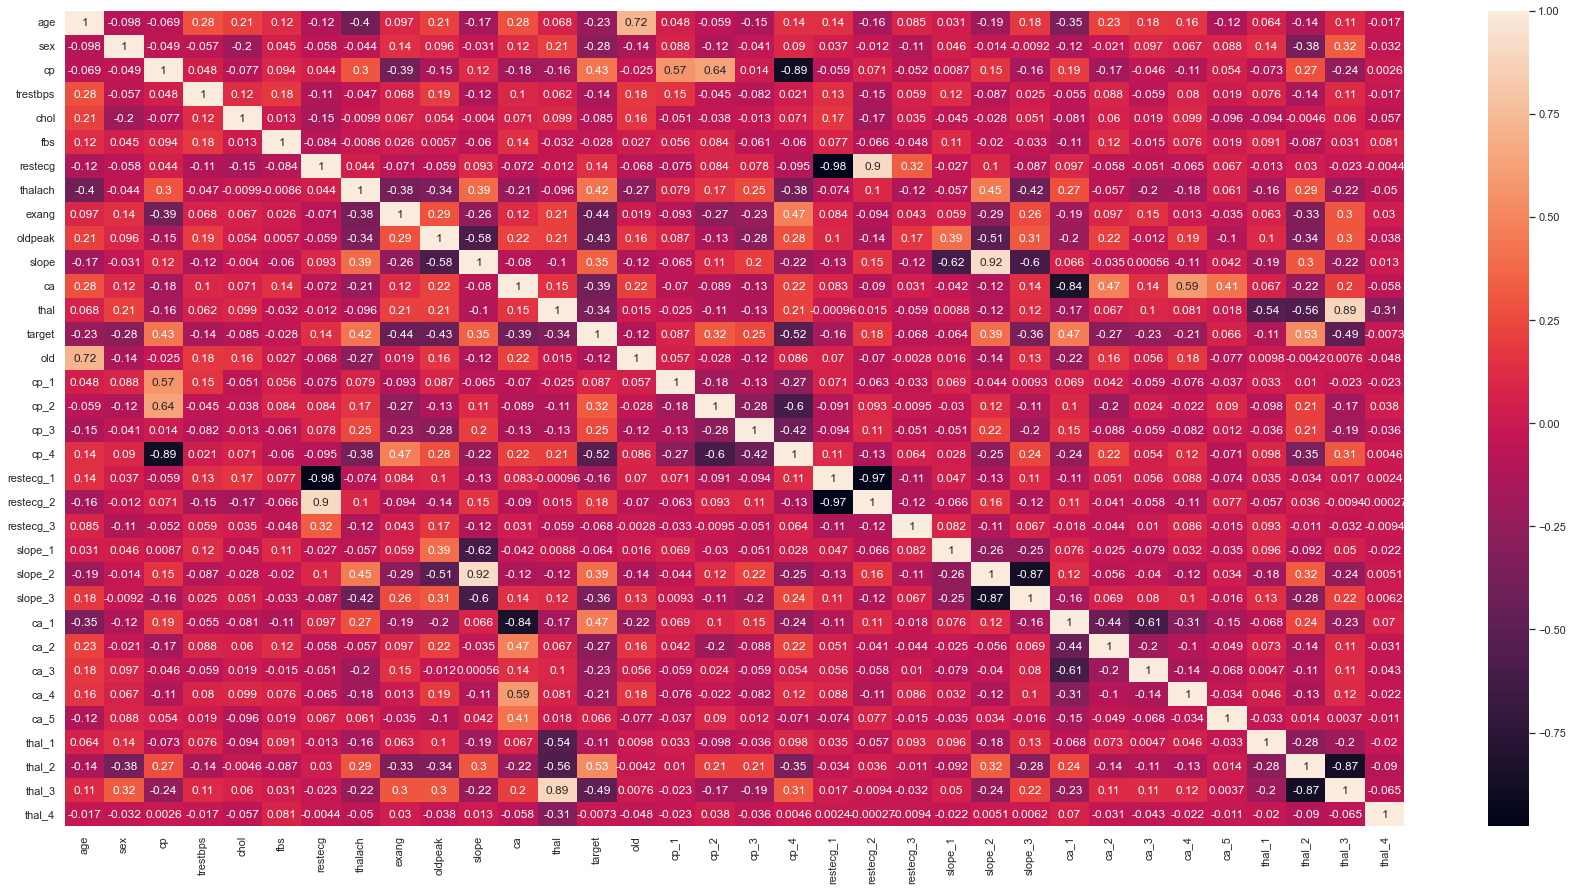

In [99]:
sns.set(rc = {'figure.figsize':(30,15)})
sns.heatmap(heart6.corr(), annot=True) 